<a href="https://colab.research.google.com/github/GhanshyamRegar/covid19-analysis/blob/main/covid19-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# COVID-19 Data Analysis Project

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
#  Load datasets
confirmed = pd.read_csv("data/covid19_Confirmed_dataset.csv")
deaths = pd.read_csv("data/covid19_deaths_dataset.csv")
happiness = pd.read_csv("data/worldwide_happiness_report.csv")


In [5]:
#  Preview data
print("Confirmed Cases Dataset")
print(confirmed.head())

print("\nDeaths Dataset")
print(deaths.head())

print("\nHappiness Dataset")
print(happiness.head())

Confirmed Cases Dataset
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20 

In [6]:
#  Data Cleaning
# Drop columns not needed
confirmed.drop(columns=["Province/State", "Lat", "Long"], inplace=True)
deaths.drop(columns=["Province/State", "Lat", "Long"], inplace=True)


In [7]:
# Aggregate by country
confirmed_total = confirmed.groupby("Country/Region").sum().reset_index()
deaths_total = deaths.groupby("Country/Region").sum().reset_index()


In [8]:
# Calculate totals
confirmed_total["Total Confirmed"] = confirmed_total.iloc[:, 1:].sum(axis=1)
deaths_total["Total Deaths"] = deaths_total.iloc[:, 1:].sum(axis=1)


In [9]:
# Merge confirmed and deaths
covid_summary = pd.merge(
    confirmed_total[["Country/Region", "Total Confirmed"]],
    deaths_total[["Country/Region", "Total Deaths"]],
    on="Country/Region"
)

covid_summary["Death Rate (%)"] = (covid_summary["Total Deaths"] / covid_summary["Total Confirmed"]) * 100



In [10]:
# Rename columns for consistency
covid_summary.rename(columns={"Country/Region": "Country"}, inplace=True)
happiness.rename(columns={"Country or region": "Country"}, inplace=True)

#  Merge with happiness data
merged = pd.merge(covid_summary, happiness, on="Country", how="inner")


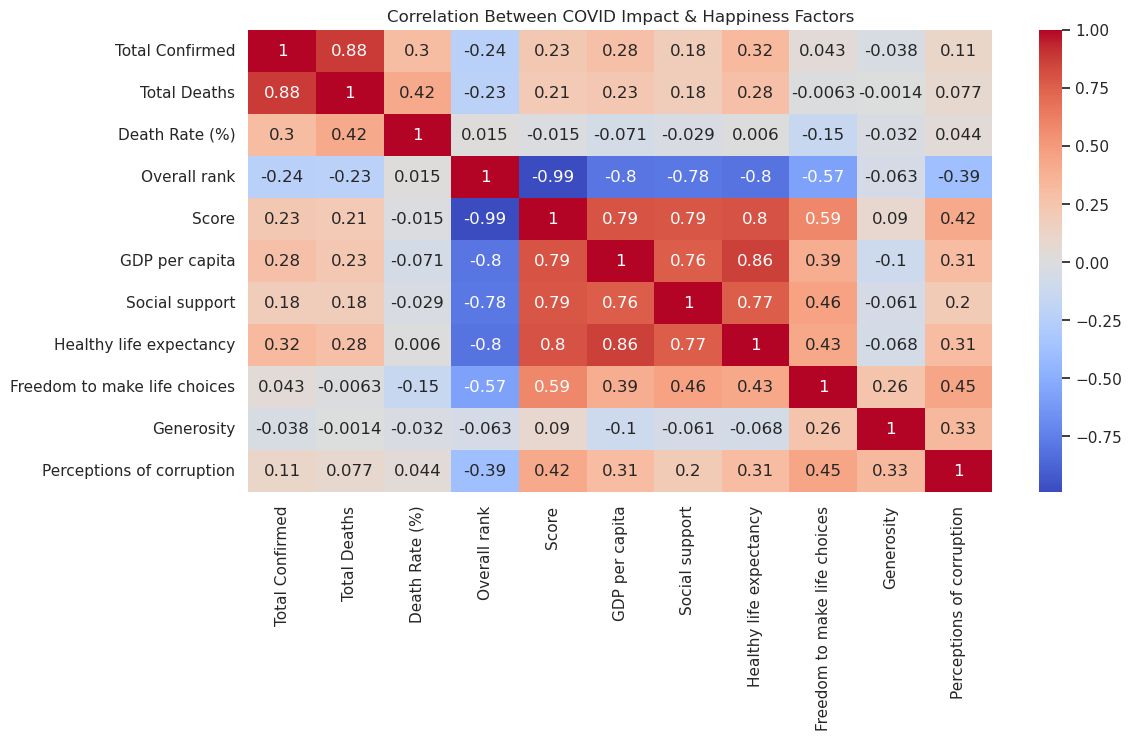

In [11]:
# Correlation heatmap
corr = merged.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between COVID Impact & Happiness Factors")
plt.show()

/tmp/ipykernel_9024/1525435826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_confirmed, x="Total Confirmed", y="Country", palette="Reds_r")


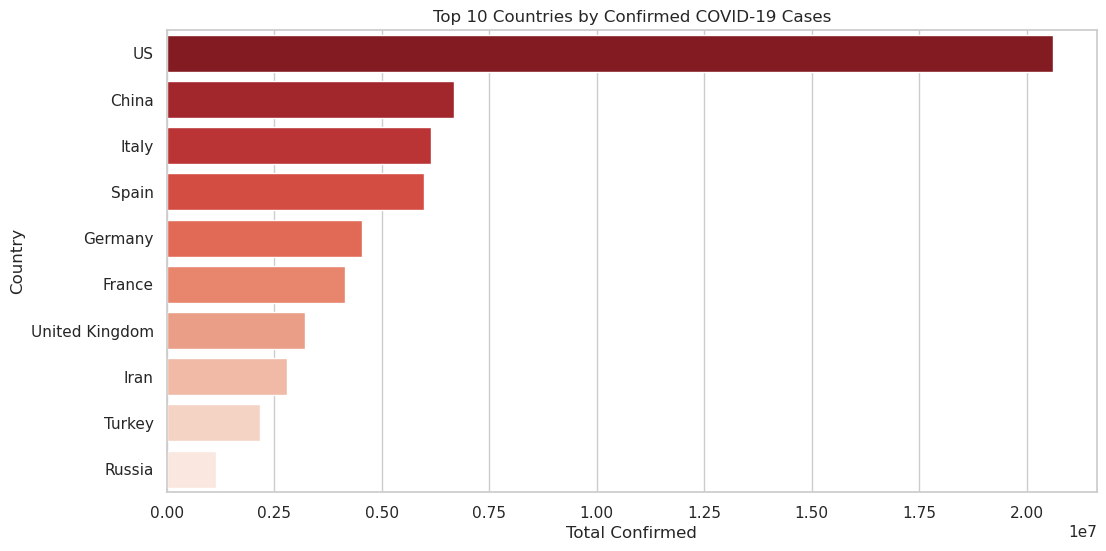

In [12]:
# Visualizations

# Top 10 countries by confirmed cases
top10_confirmed = covid_summary.sort_values(by="Total Confirmed", ascending=False).head(10)
sns.barplot(data=top10_confirmed, x="Total Confirmed", y="Country", palette="Reds_r")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.show()

/tmp/ipykernel_9024/3069980753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_death_rate, x="Death Rate (%)", y="Country", palette="Purples_r")


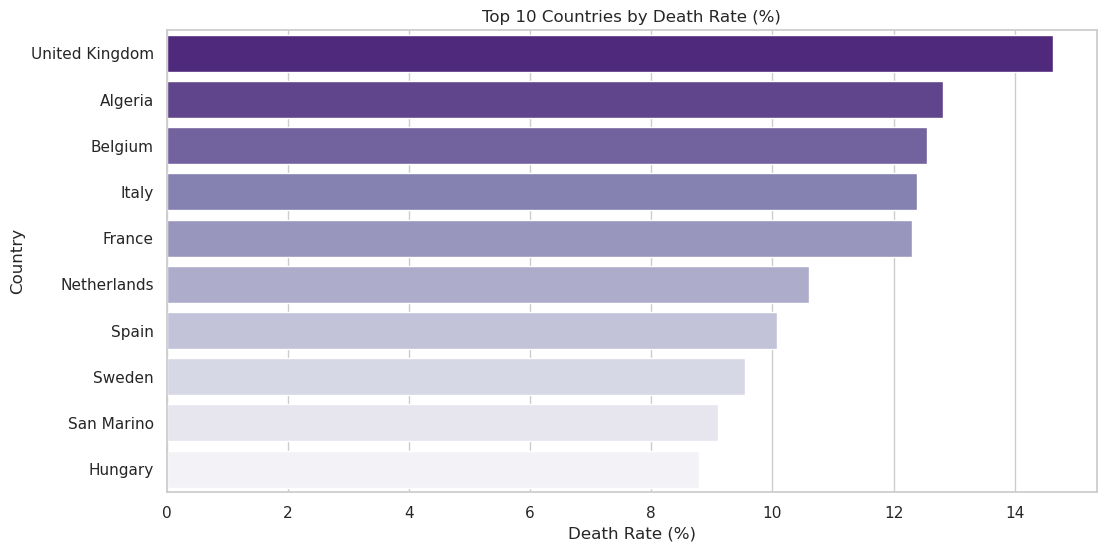

In [13]:
# Top 10 by death rate (min 10000 cases to avoid small samples)
top_death_rate = covid_summary[covid_summary["Total Confirmed"] > 10000]
top_death_rate = top_death_rate.sort_values(by="Death Rate (%)", ascending=False).head(10)
sns.barplot(data=top_death_rate, x="Death Rate (%)", y="Country", palette="Purples_r")
plt.title("Top 10 Countries by Death Rate (%)")
plt.show()

In [14]:
print(merged.columns)

Index(['Country', 'Total Confirmed', 'Total Deaths', 'Death Rate (%)',
       'Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


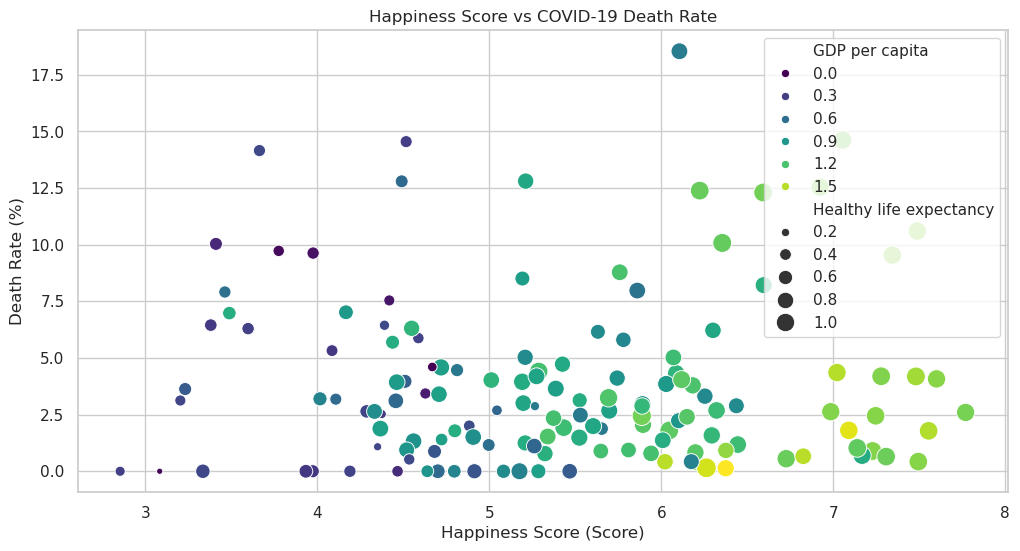

In [15]:
# Happiness Score vs Death Rate
sns.scatterplot(
    data=merged,
    x="Score",                  
    y="Death Rate (%)",
    hue="GDP per capita",        
    size="Healthy life expectancy",
    palette="viridis",       
    sizes=(20, 200)              
)
plt.title("Happiness Score vs COVID-19 Death Rate")
plt.xlabel("Happiness Score (Score)")
plt.ylabel("Death Rate (%)")
plt.show()


# Save merged data
merged.to_csv("data/merged_covid_happiness.csv", index=False)